In [1]:
import tensorflow as tf
from tensorflow import keras
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [3]:
X=pickle.load(open("X.pickle", "rb"))
y=pickle.load(open("y.pickle", "rb"))

In [33]:
num_features = 32
num_labels = 2
batch_size = 32
epochs = 15
width, height = 50, 50

In [34]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(num_features*2*2, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1),))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(num_features*2*2, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(num_features*2, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(num_features*2, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(2*2*num_features, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2*num_features, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.0001)

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(keras.optimizers.Adam(),
             loss=keras.losses.BinaryCrossentropy(),
             metrics=['accuracy']
             )
model.summary()
history=model.fit(X, y,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          callbacks=[reduce_lr]
          )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 128)       1280      
_________________________________________________________________
batch_normalization_5 (Batch (None, 48, 48, 128)       512       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 128)      

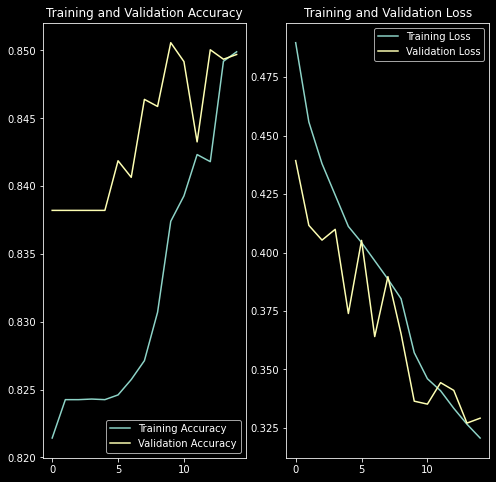

In [35]:
plt.style.use('dark_background')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
videosnumber = next(os.walk('StressVideos'))[2]
videosnumber_n = next(os.walk('NonStressVideos'))[2]
path='StressDetection/Train/Stressed'
path_n = 'StressDetection/Train/NonStressed'
n = 2
k = 30
current_image_l = 1
current_image_e = 1
for i in range(len(videosnumber)):
    F=pickle.load(open("Faces_" + str(i+1) + ".pickle", "rb"))
    ynew =model.predict(F)
    indices_e=np.argsort(ynew, axis=0)[-k:]
    indices_l=np.argsort(ynew, axis=0)[:n]
    for index in indices_l.flatten():
        Face_l =  F[index]
        cv2.imwrite(os.path.join(path, 'face_l_' + str(current_image_l) + '.jpg'), 255*Face_l)
        print('saved: ' + 'face_l_' + str(current_image_l) + '.jpg')
        current_image_l +=1
    for index in indices_e.flatten():
        Face_e = F[index]
        cv2.imwrite(os.path.join(path ,'face_e_' + str(current_image_e) + '.jpg'), 255*Face_e)
        print('saved: ' + 'face_e_' + str(current_image_e) + '.jpg')
        current_image_e +=1
current_image_l = 1
current_image_e = 1
for i in range(len(videosnumber_n)):
    F=pickle.load(open("FacesN_" + str(i+1) + ".pickle", "rb"))
    ynew =model.predict(F)
    indices_e = np.argsort(ynew, axis=0)[-k:]
    indices_l = np.argsort(ynew, axis=0)[:n]
    for index in indices_l.flatten():
        Face_l =  F[index]
        cv2.imwrite(os.path.join(path_n, 'face_l_' + str(current_image_l) + '.jpg'), 255*Face_l)
        print('saved: ' + 'face_l_' + str(current_image_l) + '.jpg')
        current_image_l +=1
    for index in indices_e.flatten():
        Face_e = F[index]
        cv2.imwrite(os.path.join(path_n ,'face_e_' + str(current_image_e) + '.jpg'), 255*Face_e)
        print('saved: ' + 'face_e_' + str(current_image_e) + '.jpg')
        current_image_e +=1

saved: face_l_1.jpg
saved: face_l_2.jpg
saved: face_e_1.jpg
saved: face_e_2.jpg
saved: face_e_3.jpg
saved: face_e_4.jpg
saved: face_e_5.jpg
saved: face_e_6.jpg
saved: face_e_7.jpg
saved: face_e_8.jpg
saved: face_e_9.jpg
saved: face_e_10.jpg
saved: face_e_11.jpg
saved: face_e_12.jpg
saved: face_e_13.jpg
saved: face_e_14.jpg
saved: face_e_15.jpg
saved: face_e_16.jpg
saved: face_e_17.jpg
saved: face_e_18.jpg
saved: face_e_19.jpg
saved: face_e_20.jpg
saved: face_e_21.jpg
saved: face_e_22.jpg
saved: face_e_23.jpg
saved: face_e_24.jpg
saved: face_e_25.jpg
saved: face_e_26.jpg
saved: face_e_27.jpg
saved: face_e_28.jpg
saved: face_e_29.jpg
saved: face_e_30.jpg
saved: face_l_3.jpg
saved: face_l_4.jpg
saved: face_e_31.jpg
saved: face_e_32.jpg
saved: face_e_33.jpg
saved: face_e_34.jpg
saved: face_e_35.jpg
saved: face_e_36.jpg
saved: face_e_37.jpg
saved: face_e_38.jpg
saved: face_e_39.jpg
saved: face_e_40.jpg
saved: face_e_41.jpg
saved: face_e_42.jpg
saved: face_e_43.jpg
saved: face_e_44.jpg
saved